# Step 5: Data Analysis with Python (Olist E-Commerce)

This notebook performs exploratory data analysis on the star schema models in BigQuery.

In [1]:
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
import os

project_id = "brazilian-ecommerce-462514"
client = bigquery.Client(project=project_id)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


## 📊 Monthly Sales Trend

In [4]:
query = """
SELECT order_month AS year_month, total_sales AS monthly_revenue, num_orders
FROM `brazilian-ecommerce-462514.brazilian_ecommerce.fact_monthly_sales`
ORDER BY order_month
"""

monthly_sales = client.query(query).to_dataframe()
monthly_sales.head()

/home/davidliaoky/miniconda3/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,year_month,monthly_revenue,num_orders
0,2016-09,354.75,3
1,2016-10,56808.84,308
2,2016-12,19.62,1
3,2017-01,137188.49,789
4,2017-02,286280.62,1733


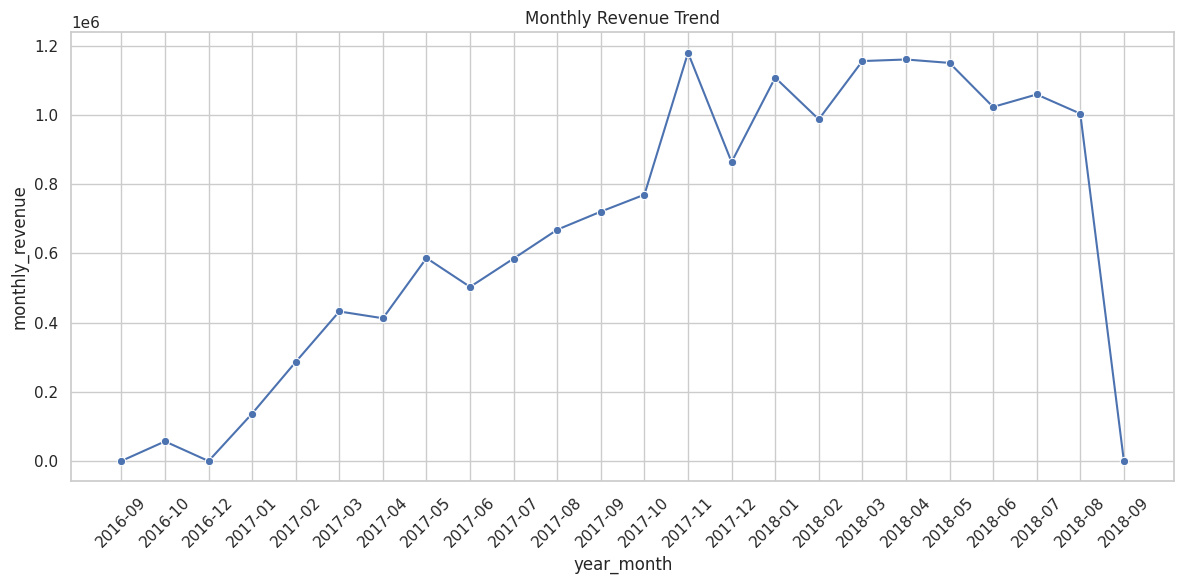

In [5]:
sns.lineplot(data=monthly_sales, x='year_month', y='monthly_revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏆 Top 10 Best-Selling Products by Revenue

In [9]:
query = """
SELECT product_category_name_english, SUM(total_revenue) AS revenue
FROM `brazilian-ecommerce-462514.brazilian_ecommerce.fact_product_sales_summary`
GROUP BY product_category_name_english
ORDER BY revenue DESC
LIMIT 10
"""

top_products = client.query(query).to_dataframe()
top_products.head()

/home/davidliaoky/miniconda3/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,product_category_name_english,revenue
0,watches_gifts,184637.03
1,health_beauty,118615.20
2,computers_accessories,88297.11
3,computers,77191.33
4,bed_bath_table,73022.92


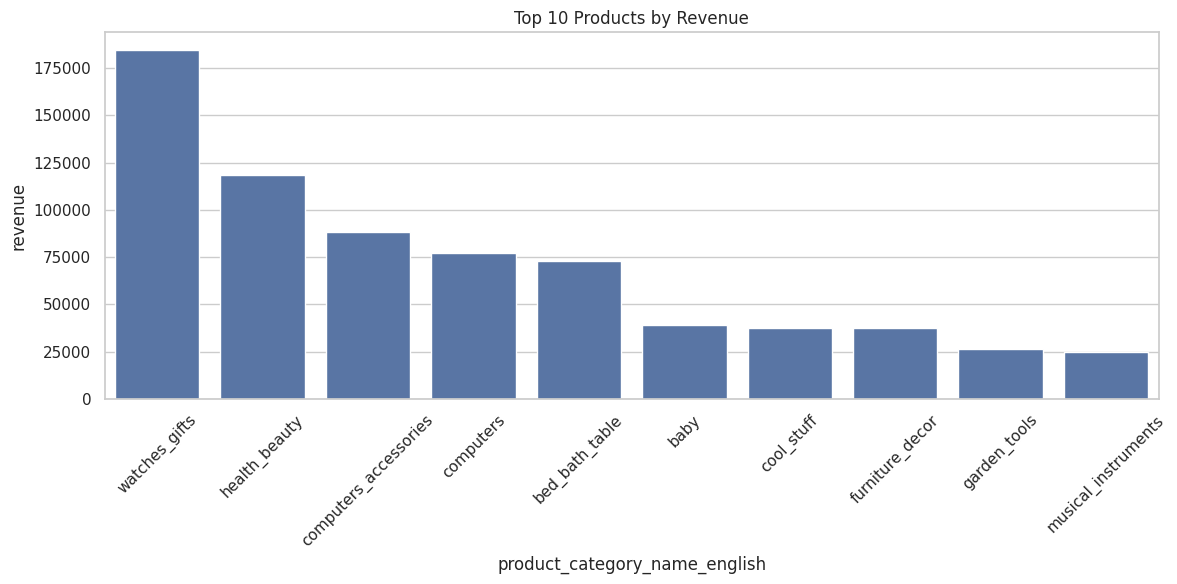

In [10]:
sns.barplot(data=top_products, x='product_category_name_english', y='revenue')
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 👥 Customer Lifetime Value Distribution

In [11]:
query = """
SELECT customer_id, lifetime_value
FROM `brazilian-ecommerce-462514.brazilian_ecommerce.fact_customer_lifetime`
"""

clv = client.query(query).to_dataframe()
clv.head()

/home/davidliaoky/miniconda3/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,customer_id,lifetime_value
0,a790343ca6f3fee08112d678b43aa7c5,9.59
1,184e8e8e48937145eb96c721ef1f0747,10.07
2,8e4bd65db637116b6b68109e4df21b84,10.89
3,046f890135acc703faff4c1fc0c2d73c,11.56
4,d2c63ad286e3ca9dd69218008d61ff81,11.62


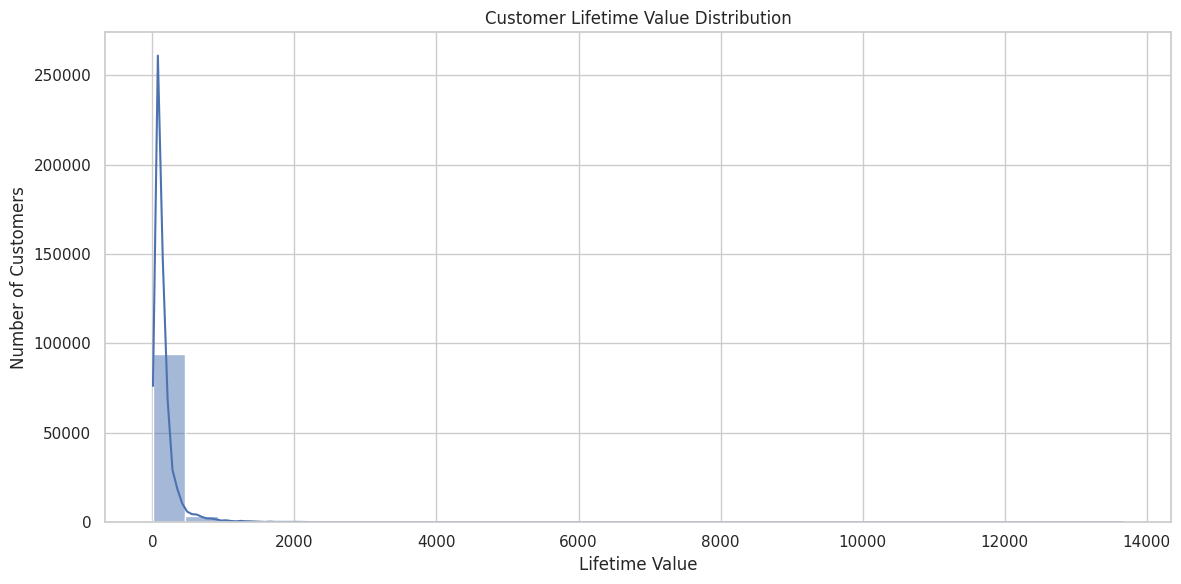

In [12]:
sns.histplot(clv['lifetime_value'], bins=30, kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Lifetime Value')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


## 💼 Expanded Business Insights for Stakeholders

---

### 📊 1. Monthly Revenue Trend
**Insight:** Revenue trends reveal seasonal peaks and valleys, with consistent growth in specific months.

**Recommendations:**
- **Marketing:** Schedule campaigns around high-revenue months.
- **Finance:** Use revenue trends for cash flow forecasting.
- **Operations:** Plan inventory and staffing based on peak periods.

---

### 🏆 2. Top-Selling Products
**Insight:** A small set of products contribute disproportionately to overall revenue.

**Recommendations:**
- **Product Teams:** Ensure high stock availability for top products.
- **Marketing:** Use top products in promotions to maximize ROI.
- **Merchandising:** Develop product bundles with best-sellers to improve attach rate.

---

### 👥 3. Customer Lifetime Value (CLV) Distribution
**Insight:** Most revenue is generated by a minority of high-value customers.

**Recommendations:**
- **CRM:** Launch loyalty programs for high-CLV customers.
- **Customer Support:** Prioritize service for VIPs to increase retention.
- **Acquisition:** Focus marketing spend on channels yielding high-CLV users.

---

### 🌟 Strategic Suggestions
Consider extending this analysis to:
- **Repeat Purchase Rate** – Identify loyal customer segments.
- **Review Score Trends** – Detect product quality or service issues.
- **Revenue by Region** – Optimize logistics and regional campaigns.
